In [1]:
import sys
sys.path.append('..')

In [2]:
from agents.ddqn import *
from utils.replay import *
from environments.wrappers import *
from networks.flexnet import *
from utils.train import *
from utils.logger import *
from utils.render import *

In [3]:
import gym
import torch

### Network, Environment, Agent

In [4]:
# parameters
img_size = (84, 84)
num_stacked_frames = 4

raw_env = gym.make('BreakoutNoFrameskip-v4')
env = AtariWrapper(raw_env, k=num_stacked_frames, img_size=img_size)

In [7]:
observation_space = raw_env.observation_space
action_space = raw_env.action_space

params = {'epsilon':1.0, 'epsilon_min':0.1, 'epsilon_decay': None, 'eps_ff': 1000000, 'eps_interval':0.9, 'eps_start':1.0, 'gamma':0.99, 'alpha':2.5e-5, 
          'network_params': None, 'memory_size':150000, 'device':'cuda:0', 'batch_size':32, 'target_net_updates':10000}

agent = DQNAgent(observation_space, action_space, **params)

In [8]:
agent.network

DeepmindCNN(
  (network): Sequential(
    (0): Conv2d(4, 32, kernel_size=(8, 8), stride=(4, 4))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
    (3): ReLU()
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=3136, out_features=512, bias=True)
    (8): ReLU()
    (9): Linear(in_features=512, out_features=4, bias=True)
  )
)

### Standard Train

In [11]:
logger = Logger('training_info')

In [12]:
save_dir = '../models/breakout/'
training_params = {'total_steps':20000000, 'logger':logger, 'save_freq':500000, 'e_verbose':50000, 'file_name': 'breakout ddqn', 'save_dir':save_dir}

In [ ]:
standard_train(agent, env, **training_params)

Steps : 50000, Average Reward: 1.1214285714285714, Memory Length: 50000, Optimizer Steps: 50000, Time Elapsed: 286.32413387298584, Target Q Updates: 5
Steps : 100000, Average Reward: 1.151624548736462, Memory Length: 100000, Optimizer Steps: 100000, Time Elapsed: 362.72354674339294, Target Q Updates: 10
Steps : 150000, Average Reward: 0.8610169491525423, Memory Length: 150000, Optimizer Steps: 150000, Time Elapsed: 456.6999294757843, Target Q Updates: 15
Steps : 200000, Average Reward: 1.2683823529411764, Memory Length: 150000, Optimizer Steps: 200000, Time Elapsed: 511.02071356773376, Target Q Updates: 20
Steps : 250000, Average Reward: 2.0210084033613445, Memory Length: 150000, Optimizer Steps: 250000, Time Elapsed: 502.8353841304779, Target Q Updates: 25
Steps : 300000, Average Reward: 2.418181818181818, Memory Length: 150000, Optimizer Steps: 300000, Time Elapsed: 493.8476655483246, Target Q Updates: 30
Steps : 350000, Average Reward: 2.76056338028169, Memory Length: 150000, Optimi

## Watch

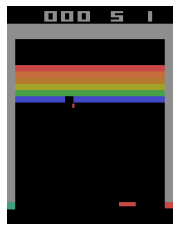

In [ ]:
render_agent(agent, env, '../models/breakout/breakout ddqn.pth', 2)